# Random Forest

In [169]:
import numpy as np
import pandas as pd

In [170]:
# Đọc dữ liệu từ pandas
df = pd.read_csv('../Dataset/archive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [171]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [172]:
X = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)
y = df['Attrition']

In [173]:
print(f'Số bản ghi dữ liệu: {len(X)}')
print(f'Số cột dữ liệu (tập X): {len(X.columns)}')


Số bản ghi dữ liệu: 1470
Số cột dữ liệu (tập X): 31


In [174]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# sử dụng OHE để mã hóa các categories của dữ liệu, Label Encode để mã hóa lại đầu ra của y
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
label_encoder = LabelEncoder()

In [175]:
X_origin = X.copy()
y_origin = y.copy()

In [176]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Giả sử X_origin là DataFrame ban đầu
encode_cols = [
    'BusinessTravel', 'Department', 'Education', 'EducationField',
    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
    'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime',
    'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
    'WorkLifeBalance'
]
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# fit chuyển đổi luôn
X_encoded_array = one_hot_encoder.fit_transform(X_origin[encode_cols])

# Lấy tên cột mới sau khi mã hóa
encoded_columns = one_hot_encoder.get_feature_names_out(encode_cols)

# Tạo DataFrame từ mảng mã hóa
X_encoded_df = pd.DataFrame(X_encoded_array, columns=encoded_columns, index=X_origin.index)

# Gộp với phần dữ liệu còn lại
X_encode = pd.concat([X_origin.drop(columns=encode_cols), X_encoded_df], axis=1)

In [177]:
X_encode['Attrition'] = X_encode['Attrition'].map({'Yes':1, 'No':0})

In [178]:
X_encode

,Age,Attrition,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,...,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,41,1,1102,1,94,5993,19479,8,11,8,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,49,0,279,8,61,5130,24907,1,23,10,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,37,1,1373,2,92,2090,2396,6,15,7,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,33,0,1392,3,56,2909,23159,1,11,8,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,27,0,591,2,40,3468,16632,9,12,6,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,41,2571,12290,4,17,17,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,39,0,613,6,42,9991,21457,4,15,9,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,27,0,155,4,87,6142,5174,1,20,6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,49,0,1023,2,63,5390,13243,2,14,17,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [179]:
y_encode = label_encoder.fit_transform(y)

In [180]:
y_encode

array([1, 0, 1, ..., 0, 0, 0], shape=(1470,))

<Axes: >

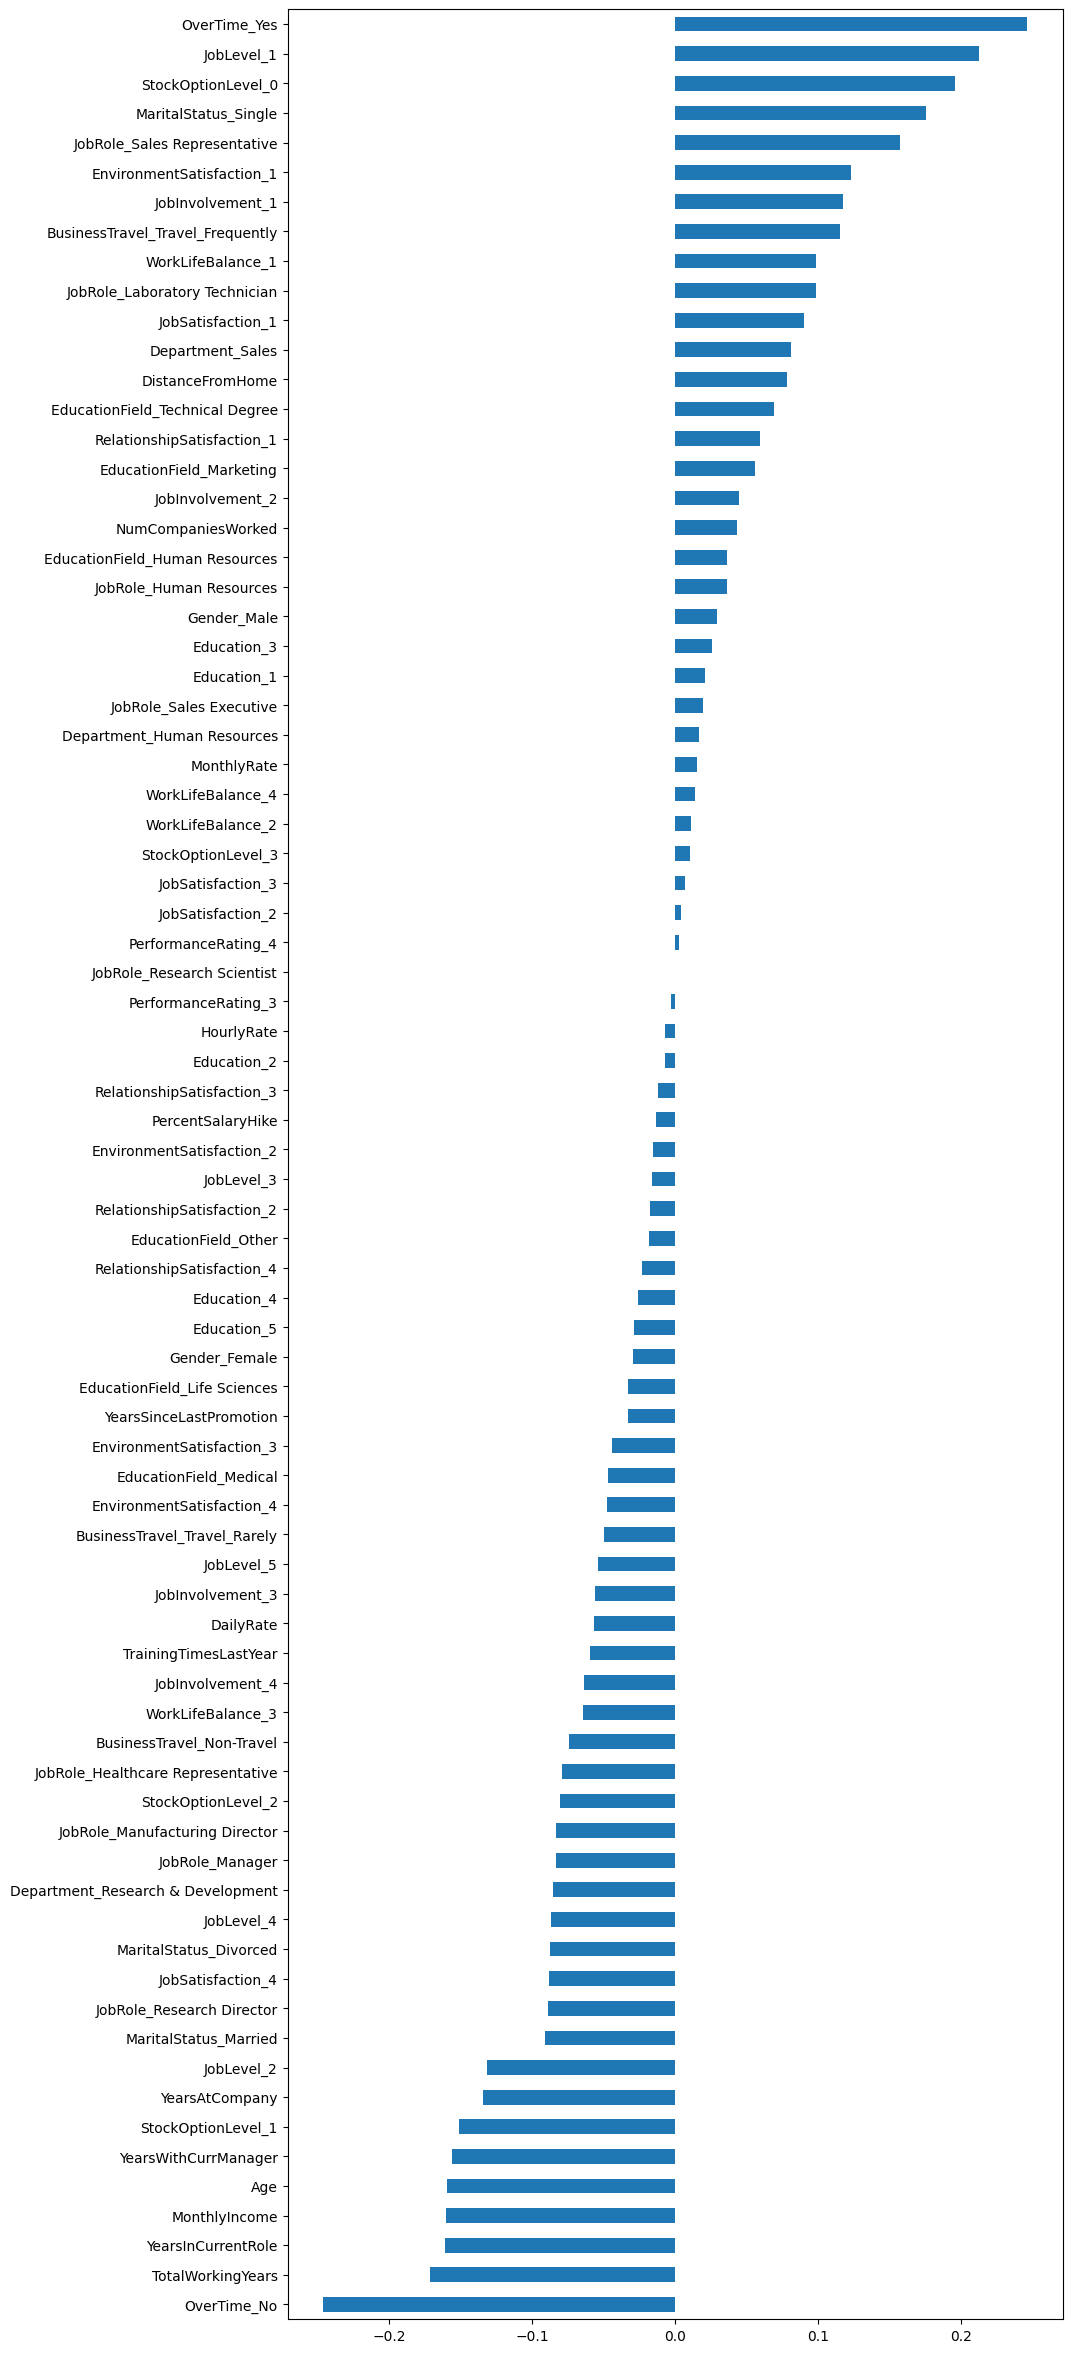

In [181]:
X_encode.drop('Attrition', axis=1).corrwith(X_encode.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

In [182]:
feature_correlation = X_encode.drop('Attrition', axis=1).corrwith(X_encode.Attrition).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index
len(model_col)

59

In [183]:
import numpy as np
from collections import Counter

class DecisionTreeClassifier:
    """Cây quyết định cơ bản cho Random Forest"""

    def __init__(self, max_depth=10, min_samples_split=2, n_features=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_features = n_features
        self.tree = None

    def _entropy(self, y):
        """Tính entropy"""
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])

    def _information_gain(self, parent, left_child, right_child):
        """Tính information gain"""
        weight_left = len(left_child) / len(parent)
        weight_right = len(right_child) / len(parent)
        gain = self._entropy(parent) - (weight_left * self._entropy(left_child) +
                                         weight_right * self._entropy(right_child))
        return gain

    def _split(self, X_column, split_thresh):
        """Chia dữ liệu theo ngưỡng"""
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _best_split(self, X, y, feat_idxs):
        """Tìm điểm chia tốt nhất"""
        best_gain = -1
        split_idx, split_thresh = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for threshold in thresholds:
                left_idxs, right_idxs = self._split(X_column, threshold)

                if len(left_idxs) == 0 or len(right_idxs) == 0:
                    continue

                gain = self._information_gain(y, y[left_idxs], y[right_idxs])

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _build_tree(self, X, y, depth=0):
        """Xây dựng cây đệ quy"""
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # Điều kiện dừng
        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return {'leaf': True, 'value': leaf_value}

        # Chọn ngẫu nhiên các features
        feat_idxs = np.random.choice(n_features, self.n_features, replace=False)

        # Tìm điểm chia tốt nhất
        best_feat, best_thresh = self._best_split(X, y, feat_idxs)

        if best_feat is None:
            leaf_value = self._most_common_label(y)
            return {'leaf': True, 'value': leaf_value}

        # Chia dữ liệu
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)

        # Xây dựng cây con
        left = self._build_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._build_tree(X[right_idxs, :], y[right_idxs], depth + 1)

        return {
            'leaf': False,
            'feature': best_feat,
            'threshold': best_thresh,
            'left': left,
            'right': right
        }

    def _most_common_label(self, y):
        """Tìm nhãn phổ biến nhất"""
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def fit(self, X, y):
        """Huấn luyện cây"""
        self.n_features = X.shape[1] if not self.n_features else min(self.n_features, X.shape[1])
        self.tree = self._build_tree(X, y)
        return self

    def _predict_tree(self, x, tree):
        """Dự đoán một mẫu"""
        if tree['leaf']:
            return tree['value']

        if x[tree['feature']] <= tree['threshold']:
            return self._predict_tree(x, tree['left'])
        return self._predict_tree(x, tree['right'])

    def predict(self, X):
        """Dự đoán nhiều mẫu"""
        return np.array([self._predict_tree(x, self.tree) for x in X])

In [184]:
class RandomForestClassifier:
    """Random Forest Classifier từ đầu"""

    def __init__(self, n_estimators=100, max_depth=10, min_samples_split=2,
                 max_features='sqrt', bootstrap=True, random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.bootstrap = bootstrap
        self.random_state = random_state
        self.trees = []

    def _get_n_features(self, n_total_features):
        """Xác định số features cho mỗi cây"""
        if self.max_features == 'sqrt':
            return int(np.sqrt(n_total_features))
        elif self.max_features == 'log2':
            return int(np.log2(n_total_features))
        elif isinstance(self.max_features, int):
            return self.max_features
        else:
            return n_total_features

    def _bootstrap_sample(self, X, y):
        """Tạo bootstrap sample"""
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def fit(self, X, y):
        """Huấn luyện Random Forest"""
        if self.random_state is not None:
            np.random.seed(self.random_state)

        self.trees = []
        n_features = self._get_n_features(X.shape[1])

        for _ in range(self.n_estimators):
            tree = DecisionTreeClassifier(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                n_features=n_features
            )

            if self.bootstrap:
                X_sample, y_sample = self._bootstrap_sample(X, y)
            else:
                X_sample, y_sample = X, y

            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

        return self

    def predict(self, X):
        """Dự đoán bằng voting"""
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [Counter(tree_pred).most_common(1)[0][0] for tree_pred in tree_preds]
        return np.array(y_pred)

    def predict_proba(self, X):
        """Dự đoán xác suất"""
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)

        probas = []
        for tree_pred in tree_preds:
            counter = Counter(tree_pred)
            total = len(tree_pred)
            proba = [counter.get(0, 0) / total, counter.get(1, 0) / total]
            probas.append(proba)

        return np.array(probas)


In [185]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_score
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

def evaluate(model, X_train, X_test, y_train, y_test):
    print("\n========== TRAINING MODEL ==========")
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print("\n========== TRAINING RESULTS ==========")
    print("CONFUSION MATRIX:")
    print(confusion_matrix(y_train, y_train_pred))
    print(f"ACCURACY: {accuracy_score(y_train, y_train_pred):.4f}")
    print(pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True)))

    print("\n========== TEST RESULTS ==========")
    print("CONFUSION MATRIX:")
    print(confusion_matrix(y_test, y_test_pred))
    print(f"ACCURACY: {accuracy_score(y_test, y_test_pred):.4f}")
    print(pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True)))

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

X_encode_copy = X_encode.drop('Attrition', axis=1)
y_encode_copy = y_encode

X_train_origin_t1, X_test_origin_t1, y_train_origin_t1, y_test_origin_t1 = train_test_split(
    X_encode_copy, y_encode_copy, test_size=0.2, random_state=42, stratify=y_encode_copy
)

X_train_origin_t2, X_test_origin_t2, y_train_origin_t2, y_test_origin_t2 = train_test_split(
    X_encode_copy, y_encode_copy, test_size=0.3, random_state=42, stratify=y_encode_copy
)

X_train_origin_t3, X_test_origin_t3, y_train_origin_t3, y_test_origin_t3 = train_test_split(
    X_encode_copy, y_encode_copy, test_size=0.4, random_state=42, stratify=y_encode_copy
)

# Chuyển đổi dữ liệu sang numpy arrays
X_train_1 = X_train_origin_t1.values if hasattr(X_train_origin_t1, 'values') else X_train_origin_t1
X_test_1 = X_test_origin_t1.values if hasattr(X_test_origin_t1, 'values') else X_test_origin_t1
y_train_1 = y_train_origin_t1.values if hasattr(y_train_origin_t1, 'values') else y_train_origin_t1
y_test_1 = y_test_origin_t1.values if hasattr(y_test_origin_t1, 'values') else y_test_origin_t1

X_train_2 = X_train_origin_t2.values if hasattr(X_train_origin_t2, 'values') else X_train_origin_t2
X_test_2 = X_test_origin_t2.values if hasattr(X_test_origin_t2, 'values') else X_test_origin_t2
y_train_2 = y_train_origin_t2.values if hasattr(y_train_origin_t2, 'values') else y_train_origin_t2
y_test_2 = y_test_origin_t2.values if hasattr(y_test_origin_t2, 'values') else y_test_origin_t2

X_train_3 = X_train_origin_t3.values if hasattr(X_train_origin_t3, 'values') else X_train_origin_t3
X_test_3 = X_test_origin_t3.values if hasattr(X_test_origin_t3, 'values') else X_test_origin_t3
y_train_3 = y_train_origin_t3.values if hasattr(y_train_origin_t3, 'values') else y_train_origin_t3
y_test_3 = y_test_origin_t3.values if hasattr(y_test_origin_t3, 'values') else y_test_origin_t3
# smote = SMOTE(sampling_strategy=0.5, random_state=42)
# X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [187]:
rf = RandomForestClassifier(
    n_estimators=200,        # Tăng số cây
    max_depth=15,            # Tăng độ sâu
    min_samples_split=5,     # Giảm overfitting
    random_state=42
)

In [188]:
evaluate(rf, X_train_1, X_test_1, y_train_1, y_test_1)


========== TRAINING MODEL ==========

========== TRAINING RESULTS ==========
CONFUSION MATRIX:
[[986   0]
 [  3 187]]
ACCURACY: 0.9974
                    0           1  accuracy    macro avg  weighted avg
precision    0.996967    1.000000  0.997449     0.998483      0.997457
recall       1.000000    0.984211  0.997449     0.992105      0.997449
f1-score     0.998481    0.992042  0.997449     0.995262      0.997441
support    986.000000  190.000000  0.997449  1176.000000   1176.000000

========== TEST RESULTS ==========
CONFUSION MATRIX:
[[244   3]
 [ 41   6]]
ACCURACY: 0.8503
                    0          1  accuracy   macro avg  weighted avg
precision    0.856140   0.666667   0.85034    0.761404      0.825850
recall       0.987854   0.127660   0.85034    0.557757      0.850340
f1-score     0.917293   0.214286   0.85034    0.565789      0.804908
support    247.000000  47.000000   0.85034  294.000000    294.000000


In [189]:
evaluate(rf, X_train_2, X_test_2, y_train_2, y_test_2)


========== TRAINING MODEL ==========

========== TRAINING RESULTS ==========
CONFUSION MATRIX:
[[863   0]
 [  1 165]]
ACCURACY: 0.9990
                    0           1  accuracy    macro avg  weighted avg
precision    0.998843    1.000000  0.999028     0.999421      0.999029
recall       1.000000    0.993976  0.999028     0.996988      0.999028
f1-score     0.999421    0.996979  0.999028     0.998200      0.999027
support    863.000000  166.000000  0.999028  1029.000000   1029.000000

========== TEST RESULTS ==========
CONFUSION MATRIX:
[[361   9]
 [ 62   9]]
ACCURACY: 0.8390
                    0          1  accuracy   macro avg  weighted avg
precision    0.853428   0.500000  0.839002    0.676714      0.796527
recall       0.975676   0.126761  0.839002    0.551218      0.839002
f1-score     0.910467   0.202247  0.839002    0.556357      0.796445
support    370.000000  71.000000  0.839002  441.000000    441.000000


In [190]:
evaluate(rf, X_train_3, X_test_3, y_train_3, y_test_3)


========== TRAINING MODEL ==========

========== TRAINING RESULTS ==========
CONFUSION MATRIX:
[[740   0]
 [  1 141]]
ACCURACY: 0.9989
                    0           1  accuracy   macro avg  weighted avg
precision    0.998650    1.000000  0.998866    0.999325      0.998868
recall       1.000000    0.992958  0.998866    0.996479      0.998866
f1-score     0.999325    0.996466  0.998866    0.997896      0.998865
support    740.000000  142.000000  0.998866  882.000000    882.000000

========== TEST RESULTS ==========
CONFUSION MATRIX:
[[485   8]
 [ 78  17]]
ACCURACY: 0.8537
                    0          1  accuracy   macro avg  weighted avg
precision    0.861456   0.680000  0.853741    0.770728      0.832140
recall       0.983773   0.178947  0.853741    0.581360      0.853741
f1-score     0.918561   0.283333  0.853741    0.600947      0.815930
support    493.000000  95.000000  0.853741  588.000000    588.000000


In [191]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import precision_recall_curve, roc_curve
#
# y_scores = xgb_scratch.predict_proba(X_test_origin_t2)[:, 1]
#
# precisions, recalls, pr_thresholds = precision_recall_curve(y_test_origin_t2, y_scores)
#
# plt.figure(figsize=(14, 6))
#
# # 1. Precision-Recall vs Threshold
# plt.subplot(1, 3, 1)
# plt.plot(pr_thresholds, precisions[:-1], label="Precision")
# plt.plot(pr_thresholds, recalls[:-1], label="Recall")
# plt.xlabel("Threshold")
# plt.ylabel("Precision / Recall")
# plt.title("Precision - Recall vs Threshold")
# plt.legend()
# plt.grid(True, alpha=0.3)
#
# # 2. Precision vs Recall (PR Curve)
# plt.subplot(1, 3, 2)
# plt.plot(recalls, precisions)
# plt.xlabel("Recall")
# plt.ylabel("Precision")
# plt.title("Precision-Recall Curve")
# plt.grid(True, alpha=0.3)
#
# # 3. ROC Curve
# fpr, tpr, roc_thresholds = roc_curve(y_test_origin_t2, y_scores)
# auc_score = roc_auc_score(y_test_origin_t2, y_scores)
#
# plt.subplot(1, 3, 3)
# plt.plot(fpr, tpr, label=f'ROC (AUC = {auc_score:.3f})')
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve")
# plt.legend()
# plt.grid(True, alpha=0.3)
#
# plt.tight_layout()
# plt.show()

In [192]:
# df = pd.DataFrame({
#     'feature': X_encode_copy.columns,
#     'importance': xgb_scratch.feature_importances_
# }).sort_values('importance', ascending=False)[:40]
#
# df.set_index('feature', inplace=True)
# df.plot(kind='barh', figsize=(10, 10))
# plt.title('Feature Importance according to Random Forest')
# plt.show()

In [193]:
# import matplotlib.pyplot as plt
# import numpy as np
#
# def plot_prediction_comparison(model,
#                                X_train_val, y_train_val,
#                                X_test, y_test,
#                                threshold=0.5):
#
#     # --- TRAIN/VAL ---
#     y_train_proba = model.predict_proba(X_train_val)[:, 1]
#     y_train_pred = (y_train_proba >= threshold).astype(int)
#
#     # --- TEST ---
#     y_test_proba = model.predict_proba(X_test)[:, 1]
#     y_test_pred = (y_test_proba >= threshold).astype(int)
#
#     # --- VẼ HAI SUBPLOT ---
#     plt.figure(figsize=(14, 6))
#
#     # ====== PLOT TRAIN / VAL ======
#     plt.subplot(1, 2, 1)
#     idx_train = np.arange(len(y_train_val))
#
#     correct_idx_train = idx_train[y_train_pred == y_train_val]
#     wrong_idx_train = idx_train[y_train_pred != y_train_val]
#
#     plt.scatter(correct_idx_train, y_train_val[correct_idx_train],
#                 color='green', label='Dự đoán đúng', s=30)
#     plt.scatter(wrong_idx_train,  y_train_val[wrong_idx_train],
#                 color='red', label='Dự đoán sai', s=30, marker='x')
#
#     plt.title("So sánh Dự đoán và Thực tế (Train + Validation)")
#     plt.xlabel("Index")
#     plt.ylabel("Nhãn (0/1)")
#     plt.legend()
#     plt.grid(True, linestyle='--', alpha=0.5)
#
#     # ====== PLOT TEST ======
#     plt.subplot(1, 2, 2)
#     idx_test = np.arange(len(y_test))
#
#     correct_idx_test = idx_test[y_test_pred == y_test]
#     wrong_idx_test = idx_test[y_test_pred != y_test]
#
#     plt.scatter(correct_idx_test, y_test[correct_idx_test],
#                 color='green', label='Dự đoán đúng', s=30)
#     plt.scatter(wrong_idx_test,  y_test[wrong_idx_test],
#                 color='red', label='Dự đoán sai', s=30, marker='x')
#
#     plt.title("So sánh Dự đoán và Thực tế (Test)")
#     plt.xlabel("Index")
#     plt.ylabel("Nhãn (0/1)")
#     plt.legend()
#     plt.grid(True, linestyle='--', alpha=0.5)
#
#     plt.tight_layout()
#     plt.show()


In [194]:
# plot_prediction_comparison(
#     model=xgb_scratch,
#     X_train_val=X_train_origin_t2,
#     y_train_val=y_train_origin_t2,
#     X_test=X_test_origin_t2,
#     y_test=y_test_origin_t2,
#     threshold=0.5499999999999999
# )

1. ROC AUC Score (Điểm Tiêu Chuẩn Tổng Thể)

- Điểm Test AUC dao động từ 0.817 đến 0.851, đây là một kết quả tốt cho thấy mô hình có khả năng phân biệt tương đối cao giữa hai lớp (Ở lại/Nghỉ việc) trên tập dữ liệu chưa từng thấy.Tuy nhiên, có một khoảng cách đáng kể giữa Train AUC và Test AUC (ví dụ: ở tỉ lệ 8/4, chênh lệch $\approx 0.13$), cho thấy mô hình có thể đang bị Overfitting (Quá khớp) ở một mức độ nào đó trên tập huấn luyện.

2. Hiệu suất cho Lớp Thiểu số (Nghỉ việc - Lớp 1)

- Precision thấp (0.40): Nghĩa là trong số các dự đoán là "Nghỉ việc", chỉ có 40% là đúng. Có nhiều False Positives (FP) (dự đoán nghỉ việc nhưng thực tế ở lại), dẫn đến việc bộ phận HR có thể lãng phí nguồn lực để can thiệp vào những trường hợp không cần thiết.

- Recall tương đối cao (0.68): Nghĩa là mô hình tìm được 68% số trường hợp nghỉ việc thực tế. Điều này tốt vì mục tiêu chính là không bỏ sót (giảm thiểu False Negatives - FN).

- F1-score trung bình (0.50): Là giá trị hài hòa giữa Precision và Recall.

3. So sánh các tỉ lệ chia dữ liệu:

- Các F1-score trên tập kiểm tra đều ở mức trung bình thấp (khoảng 0.50 đến 0.53). Điều này cho thấy mặc dù AUC tốt, mô hình vẫn còn gặp khó khăn trong việc cân bằng giữa Precision và Recall để phân loại chính xác lớp "Nghỉ việc" trong điều kiện thực tế. Tỉ lệ 7/3 cho F1-score cao nhất.

4. Kết Luận Đánh Giá
- Mô hình XGBoost phù hợp để sử dụng trong bài toán này, dựa trên những lý do sau:

- AUC tốt (0.817 - 0.851): Khả năng phân biệt tổng thể của mô hình là mạnh.

- Recall chấp nhận được (khoảng 0.68): Mô hình có khả năng tìm ra phần lớn các trường hợp nghỉ việc thực tế, rất quan trọng cho các hành động can thiệp của HR.

- Tuy nhiên, cần có sự cải thiện do:

    - Overfitting: Khoảng cách lớn giữa Train AUC và Test AUC.

    - Precision thấp cho Lớp 1: Tỉ lệ chính xác khi dự đoán "Nghỉ việc" chỉ khoảng 40%, dẫn đến nhiều dự đoán sai và tốn kém tài nguyên.

    - F1-score chưa cao: Cần tăng cường F1-score lên trên 0.6 hoặc 0.7 để đảm bảo mô hình thực sự hữu ích.